In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()

In [3]:
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

data_dir = "~/Downloads/hymenoptera_data/hymenoptera_data"
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ["train", "val"]
}
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=4, shuffle=True, num_workers=4
    )
    for x in ["train", "val"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes

device = torch.device("cpu")

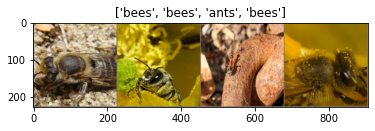

In [4]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders["train"]))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [6]:
inputs.size()

torch.Size([4, 3, 224, 224])

In [8]:
inputs[0].size()

torch.Size([3, 224, 224])

In [11]:
inputs[0][0].size()

tensor([[ 1.4098,  1.4098,  1.4440,  ...,  1.8722,  1.7352,  1.6838],
        [ 1.1358,  1.1187,  1.0673,  ...,  1.9407,  1.8037,  1.7009],
        [ 0.9132,  0.7591,  0.6049,  ...,  1.8893,  1.7009,  1.5982],
        ...,
        [ 0.8961, -0.0116, -0.4054,  ...,  1.8379,  1.5468,  1.4612],
        [ 0.9817,  0.8789, -0.6623,  ...,  1.9407,  2.0263,  2.0263],
        [ 1.1529,  1.4098,  0.8789,  ...,  1.9578,  2.0263,  1.9749]])

In [19]:
characters = "abcdefghijklmnopqrstuvwxyz"
characters_list = [c for c in characters]
length = len(characters_list)
chunks = 8

import math

split_size = math.ceil(length / chunks)

[
    characters_list[max(0, i * split_size) : min(length, (i + 1) * split_size)]
    for i in range(chunks)
]

[['a', 'b', 'c', 'd'],
 ['e', 'f', 'g', 'h'],
 ['i', 'j', 'k', 'l'],
 ['m', 'n', 'o', 'p'],
 ['q', 'r', 's', 't'],
 ['u', 'v', 'w', 'x'],
 ['y', 'z'],
 []]